In [4]:
import pandas as pd

In [5]:
_dictionary = pd.read_csv("data_dictionary.csv")
_data = pd.read_csv("Wimbledon_featured_matches.csv")

In [6]:
dictionary = _dictionary.copy()
dictionary

,variables,explanation,example
0,match_id,match identification,"2023-wimbledon-1701 (""7"" is the round, and ""01..."
1,player1,first and last name of the first player,Carlos Alcaraz
2,player2,first and last name of the second player,Novak Djokovic
3,elapsed_time,time elapsed since start of first point to sta...,0:10:27
4,set_no,set number in match,"1, 2, 3, 4, or 5"
5,game_no,game number in set,"1, 2, ...,7"
6,point_no,point number in game,"1, 2, 3... etc."
7,p1_sets,sets won by player 1,"0, 1, or 2"
8,p2_sets,sets won by player 2,"0, 1, or 2"
9,p1_games,games won by player 1 in current set,"0, 1,...,6"


In [7]:
data = _data.copy()
data.head()

,match_id,player1,player2,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,...,p2_break_pt_won,p1_break_pt_missed,p2_break_pt_missed,p1_distance_run,p2_distance_run,rally_count,speed_mph,serve_width,serve_depth,return_depth
0,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:00:00,1,1,1,0,0,0,...,0,0,0,6.000,7.840,2,95.0,BC,NCTL,ND
1,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:00:38,1,1,2,0,0,0,...,0,0,0,5.253,7.094,1,118.0,B,CTL,ND
2,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:01:01,1,1,3,0,0,0,...,0,0,0,13.800,19.808,4,120.0,B,NCTL,D
3,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:01:31,1,1,4,0,0,0,...,0,0,0,51.108,75.631,13,130.0,BW,CTL,D
4,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:02:21,1,1,5,0,0,0,...,0,0,0,0.649,0.813,1,112.0,W,NCTL,NaN


In [8]:
print(data.columns)

Index(['match_id', 'player1', 'player2', 'elapsed_time', 'set_no', 'game_no',
       'point_no', 'p1_sets', 'p2_sets', 'p1_games', 'p2_games', 'p1_score',
       'p2_score', 'server', 'serve_no', 'point_victor', 'p1_points_won',
       'p2_points_won', 'game_victor', 'set_victor', 'p1_ace', 'p2_ace',
       'p1_winner', 'p2_winner', 'winner_shot_type', 'p1_double_fault',
       'p2_double_fault', 'p1_unf_err', 'p2_unf_err', 'p1_net_pt', 'p2_net_pt',
       'p1_net_pt_won', 'p2_net_pt_won', 'p1_break_pt', 'p2_break_pt',
       'p1_break_pt_won', 'p2_break_pt_won', 'p1_break_pt_missed',
       'p2_break_pt_missed', 'p1_distance_run', 'p2_distance_run',
       'rally_count', 'speed_mph', 'serve_width', 'serve_depth',
       'return_depth'],
      dtype='object')


In [9]:
players = data["player1"]
players = players._append(data["player2"], ignore_index=True).drop_duplicates().reset_index().set_index(0)
players["Inertia"] = 0
players = players.drop("index", axis = 1)
players

,Inertia
0,
Carlos Alcaraz,0
Alexander Zverev,0
Frances Tiafoe,0
Alejandro Davidovich Fokina,0
Daniil Medvedev,0
Jiri Lehecka,0
Christopher Eubanks,0
Laslo Djere,0
Jannik Sinner,0


In [10]:
player_pairs = data[["player1","player2"]].drop_duplicates().reset_index()[["player1","player2"]]
player_pairs

,player1,player2
0,Carlos Alcaraz,Nicolas Jarry
1,Alexander Zverev,Matteo Berrettini
2,Frances Tiafoe,Grigor Dimitrov
3,Alejandro Davidovich Fokina,Holger Rune
4,Daniil Medvedev,Marton Fucsovics
5,Jiri Lehecka,Tommy Paul
6,Christopher Eubanks,Christopher O'Connell
7,Laslo Djere,Stefanos Tsitsipas
8,Jannik Sinner,Quentin Halys
9,Daniel Elahi Galan,Mikael Ymer


# Inertia Analysis

$$
I^{(i)}\propto P_w^{(i)}
$$

In [11]:
win_lose = data.copy()
win_lose["p1_score"][win_lose["p1_score"]=='AD'] = 60
win_lose["p2_score"][win_lose["p2_score"]=='AD'] = 60
win_lose["p1_score"].iloc[:10]


/tmp/ipykernel_2616001/2929302636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  win_lose["p1_score"][win_lose["p1_score"]=='AD'] = 60
/tmp/ipykernel_2616001/2929302636.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  win_lose["p2_score"][win_lose["p2_score"]=='AD'] = 60


0     0
1     0
2    15
3    15
4    30
5    40
6    40
7    60
8    40
9    60
Name: p1_score, dtype: object

In [12]:
win_lose = win_lose[["player1", "player2", "p1_score", "p2_score"]]
win_lose["p1_win"] = win_lose["p1_score"].astype(int)!=win_lose["p1_score"].astype(int).shift(1).fillna(0)
win_lose["p2_win"] = win_lose["p2_score"].astype(int)!=win_lose["p2_score"].astype(int).shift(1).fillna(0)
win_lose

,player1,player2,p1_score,p2_score,p1_win,p2_win
0,Carlos Alcaraz,Nicolas Jarry,0,0,False,False
1,Carlos Alcaraz,Nicolas Jarry,0,15,False,True
2,Carlos Alcaraz,Nicolas Jarry,15,15,True,False
3,Carlos Alcaraz,Nicolas Jarry,15,30,False,True
4,Carlos Alcaraz,Nicolas Jarry,30,30,True,False
...,...,...,...,...,...,...
7279,Carlos Alcaraz,Novak Djokovic,0,15,False,True
7280,Carlos Alcaraz,Novak Djokovic,15,15,True,False
7281,Carlos Alcaraz,Novak Djokovic,30,15,True,False
7282,Carlos Alcaraz,Novak Djokovic,30,30,False,True


In [13]:
sum(win_lose['p1_win']==win_lose['p2_win'])

910

In [14]:
p1 = win_lose[["player1",'p1_win']].groupby("player1").mean()
p2 = win_lose[["player2",'p2_win']].groupby("player2").mean()
p1

,p1_win
player1,
Alejandro Davidovich Fokina,0.563798
Alexander Bublik,0.632432
Alexander Zverev,0.567164
Andrey Rublev,0.565632
Carlos Alcaraz,0.594035
Christopher Eubanks,0.554054
Daniel Elahi Galan,0.547170
Daniil Medvedev,0.591398
Denis Shapovalov,0.600000


In [15]:
for player in players.index:
    
    if player in player_pairs['player1'].values:
        players['Inertia'][player] = p1['p1_win'][player]
    else:
        players['Inertia'][player] = p2['p2_win'][player]

/tmp/ipykernel_2616001/1829948580.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5940347970173985' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  players['Inertia'][player] = p1['p1_win'][player]


In [16]:
players = players.sort_values('Inertia', ascending=False)
players

,Inertia
0,
Alexander Bublik,0.632432
Roman Safiullin,0.625641
Jannik Sinner,0.601458
Denis Shapovalov,0.600000
Carlos Alcaraz,0.594035
Daniil Medvedev,0.591398
Stefanos Tsitsipas,0.588235
Novak Djokovic,0.581864
Jiri Lehecka,0.581325


### General Ability Ranking

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("dark")

/home/yz812/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  grouped_vals = vals.groupby(grouper)


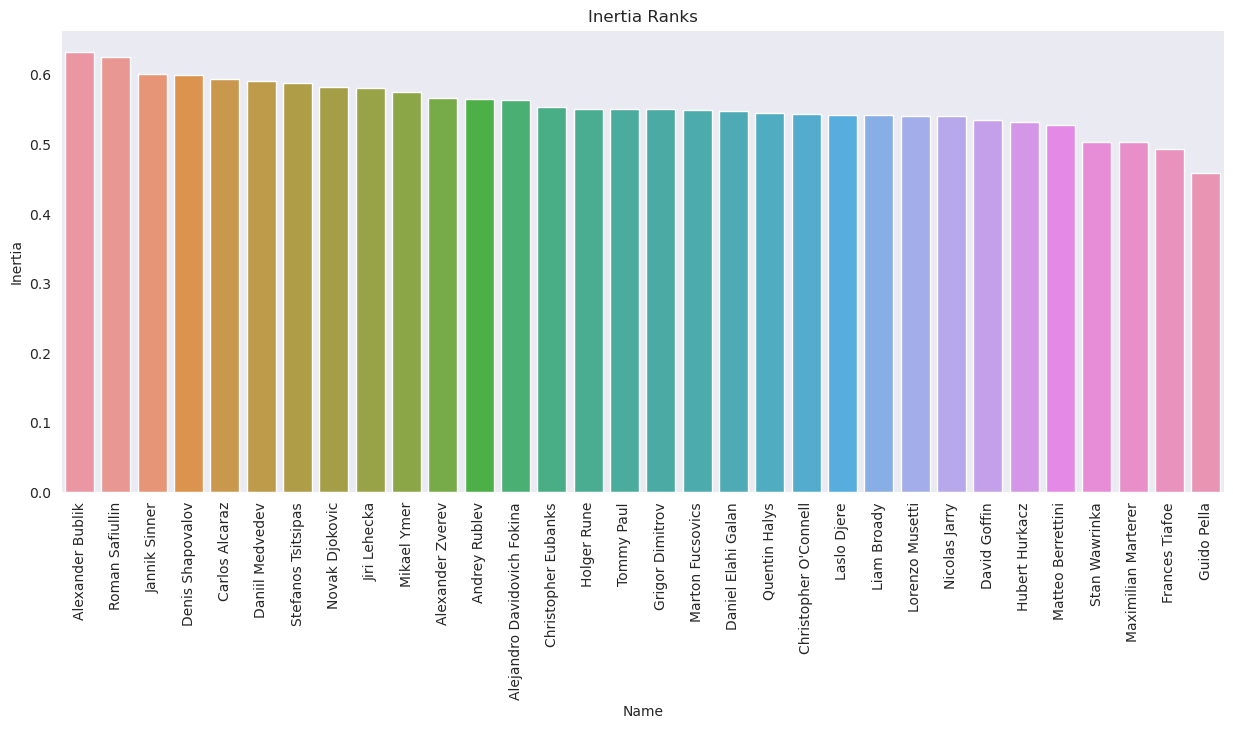

In [52]:
plt.figure(figsize=(15, 6))
sns.barplot(x=players.index, y='Inertia', data=players)
plt.title('Inertia Ranks')
plt.xlabel('Name')
plt.ylabel('Inertia')
plt.xticks(rotation=90)
plt.savefig('0-1-IneriaRanks.eps', format='eps', bbox_inches='tight')
plt.show()